##Welcome to GeoDiagram Assistant!
**This friendly python notebook will help you out with all those tedious Geochemical Diagrams everybody hates doing but are extremely important in the study of rocks. *GeoDiagram Friend* is the perfect tool for geologists who are looking excel and save lots of time for your classes or for personal investigation.**

Please run the following 4 blocks of code and let the fun begin!


In [69]:
#Importar todas las librerias de interés.
%pylab inline
from matplotlib.figure import Figure
from matplotlib import style
import matplotlib.animation as animation
import matplotlib.pylab as py
import matplotlib.pyplot as plt
import urllib
import warnings
from scipy.misc import imread
from scipy.optimize import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [70]:
data=[]  #Acá se guardarán los datos geoquímicos y los valores estándar para el MORB y el condrito.
SV=[]
SV1=[] #SV1 lo importa como datos de tipo string que serán útiles luego.
example=str("example")  #Variable explicada a continuación. (Archivo de prueba para el programa).
def Datos(archivo):
    global data
    global SV
    global SV1
    
    if (archivo==example):
        data=np.genfromtxt("https://raw.githubusercontent.com/nrangel95/Proyecto/master/GeoDatos.csv", delimiter=',')
    else:
        data=np.genfromtxt(archivo, delimiter=',')  #Si el usuario tiene un archivo lo entra como parámetro.
    
    #SV represents the standard values for the Chondritic and MORB (Mid Ocean Ridge Basalt) compositions.
    SV= np.genfromtxt("https://raw.githubusercontent.com/nrangel95/Proyecto/master/Condrito.csv", delimiter=',')
    SV1= np.genfromtxt("https://raw.githubusercontent.com/nrangel95/Proyecto/master/Condrito.csv", delimiter=',',dtype='str')
    
    #En esta línea se descarga las imágenes plantilla de los Diagramas de Variación TAS y Winchester.
    import urllib.request
    urllib.request.urlretrieve("https://cloud.githubusercontent.com/assets/12629060/8786975/f97c5e1a-2ef6-11e5-971e-2a3140a77a7a.png","TAS.jpg")
    urllib.request.urlretrieve("https://cloud.githubusercontent.com/assets/12629060/8806683/77157fe0-2f9d-11e5-9297-ace17a9b4896.jpg","winchester.jpg")

Datos(example)  #Se ejecuta el archivo de ejemplo para tener algo con que trabajar. Puede ser modificado más adelante.


#Se define una función que modifique el estilo para cada vez que se vaya a graficar.
def estilacho(estilo):
    if (estilo==1):
        style.use("ggplot")
    if (estilo==2):
        style.use('dark_background')
    else:
        style.use('bmh')
        
        

In [78]:
#En este bloque de código está consignado todo lo referente a graficación.

MORB=SV[2][31:52]      #Acá quedarán consignados los valores de composición del MORB.

y="yes"  #Variables para el parámetro 'guarda'.
n="no"
def spider(estilo, guarda):
    
    estilacho(estilo)

    py.figure(figsize=(13,7))  
    ejex=SV1[0,31:52]      #Símbolos de los elementos de interés.
    x = linspace(0,1,len(ejex))  
    py.xticks(x, ejex)  #Reemplaza el linspace con el que se grafica por los símbolos conseguidos anteriormente.
    py.yscale('log') #Demás aspectos propios del diagrama mismo.
    py.ylabel('Muestra/N-MORB /log', fontsize=12,)
    py.xlim(-0.001,1.001)
    elementos=[]
    
    global anomalias  #Acá se guardan los elementos que tienen un enriquecimiento sifnificativo en las muestras.
    anomalias=[]
    
    for i in range (1,len(data)-1):
        for j in range (30,51):
            elementos.append(data[i,j])    #Se guardan los datos de cada elemento de interés.
        elementos=elementos/MORB        #Normalización a la composición del MORB.

        for cont in range (0,len(elementos)):
            if (elementos[cont]>10 or elementos[cont]<0.001):
                anomalias.append(SV1[0,cont+31])   #El +31 es para continuar con los índices correspondientes para cada índice.
        anomalias=list(set(anomalias))   #La función set elimina los elementos duplicados.
    
        py.plot(x,elementos, label='Muestra '+str(i)) #Se realiza un plot para cada muestra.
        elementos=[]
    
    py.legend()
    plt.title("Spider Diagram normed to the MORB composition",color='r')
    plt.axhline(1, color='black',lw=1)  #Línea que representa una composición idéntica a la de referencia.
    py.show()
    
    #DESDE ACÁ EMPIEZA LA INTERPRETACIÓN DE GRÁFICAS
    
    print("Composition anomalies in relation to the MORB presented in the following elements", anomalias)
    print("")
    print("\033[1m" + 'DIAGNOSIS' + "\033[0;0m")
    if (len(anomalias)>10):  #El exceso en anomalías significa que la comparación es errada.
        print("The samples you colleceted probably do not belong to a Mid Ocean Ridge Basalt, please try another diagram.")
    else: #Pocas anomalías se pueden explicar en procesos de alteración y cristalización, pero son muy específicos para generalizar en código. 
        print("Congratulations, you have found a match! The samples provided correspond to a MORB.")
    
    
    if (guarda==y):  #Parámetro que guarda la gráfica elaborada.
        savefig("Spider.jpg")
        
   #--------------------------------------------------------------------------------------------------------
    
#Gráfica de Tierras Raras (Normalizado al Condrito) cuya composición está consignada a continuación. 
Condr=SV[1][28:52]  

def TR(estilo,guarda):
    
    estilacho(estilo)

    py.figure(figsize=(13,7))
    ejex=SV1[0,28:52]   #Modifico ejex para tomar las Tierras Raras.
    x = linspace(0,1,len(ejex))
    py.xticks(x, ejex) 
    py.yscale('log')                                   #Mismos comentarios que en la función anterior.
    py.ylabel('Muestra/Condrito /log', fontsize=12) 
    py.xlim(-0.001,1.001)
    
    elementos2=[]
    global anomaliasREE     #Anomalías para esta gráfica.
    anomaliasREE=[]
    
    for i in range (1,len(data)-1):
        for j in range (27,51):
            elementos2.append(data[i,j])
        elementos2=elementos2/Condr   #Normalización al condrito.
        
        for cont in range (0,len(elementos2)):
            if (elementos2[cont]>10 or elementos2[cont]<0.001):
                anomaliasREE.append(SV1[0,cont+28])
        anomaliasREE=list(set(anomaliasREE))   #La función set elimina los elementos duplicados.
        
        py.plot(x,elementos2, label='Muestra '+str(i))
        
        elementos2=[]
    
    py.legend(loc=4)
    plt.axhline(1, color='black',lw=1)
    plt.title("REE Diagram normed to the chondritic composition",color='r')
    py.show()
    
    print("Composition anomalies in relation to the Chondrite presented in the following elements", anomaliasREE)
    print("")
    print("\033[1m" + 'DIAGNOSIS')
    if (len(anomaliasREE)>10):
        print("The samples you colleceted probably do not belong to a Chondrite, please try another diagram.")
    else:
        print("Congratulations, you have found a match! The samples provided correspond to a chodritic composition.")

    if (guarda==y):
        savefig("TR.jpg")
        
  #--------------------------------------------------------------------------------------------------------

def TAS(estilo,guarda):

    estilacho(estilo)
    
    
    silice=[]           #Un diagrama de variación TAS grafica peso en sílice vs. peso en alkalís.
    alkalis=[]
    diagn=1            #Variable posteriormente usada para el diagnóstico. 
    
    py.figure(figsize=(15,8))
    xlim(35,79)
    ylim(0,16)
    img = imread("TAS.jpg")         #Imagen plantilla para el diagrama.
    
    for i in range (1,len(data)-1):
        silice.append(data[i,1])              #Revisar la correspondencia con el número de columnas en el archivo data.
        alkalis.append(data[i,7]+data[i,8])     
        py.plot(silice[-1],alkalis[-1],"o",zorder=1,label='Muestra '+str(i))  
    
    xlabel("$SiO_2  wt\%$",fontsize=20)
    ylabel("$Na_2O + K_2O$ $ wt\%$",fontsize=20)
    py.imshow(img,zorder=0,extent=[35, 79, 0, 16])
    py.grid('off')
    plt.title("TAS Variation Diagram",color='r') 
    
    
    if (guarda==y):
        savefig("TAS.jpg")
    
    
    if (all(array(silice)<45)):                      #Valores relacionados a la acidez del magma.
        diagn="Ultrabasic Magma"
    if (all(array(silice)>=45) and all(array(silice)<52)):
        diagn="Basic Magma"
    if (all(array(silice)>=52) and all(array(silice)<63)):
        diagn="Intermediate Magma"
    if (all(array(silice)>=63)):
        diagn="Acidic Magma"
    
    
#Ahora definiré una función que divide las series subalcalinas de las alcalinas. Para saber más acerca
#de esto por favor revisar la siguiente imagen. http://www.revistas.unal.edu.co/index.php/rbct/article/viewFile/29297/39414/163494

#Para lograr esto haré una función de ajuste que se acomode a dicha línea que separa las dos series. Revisar función curve_fit
    
    xx=[40,45,46,48,50,55,56,65,70]    #Estos datos fueron obtenidos del link mencionado anteriormente de manera aproximada, para poder hacer el ajuste. ("Al ojo")
    yy=[0,2.9,3,4,5,6.2,7,8,9]
    
    def ajuste(x, a, b):
        return a*log(x) + b    #Incluí una función logarítmica pues el es la que más se asemeja a la línea en cuestión.
    fitpars, covmat=curve_fit(ajuste, xx, yy)
    
    arregloX = linspace(min(xx), 75, 100)     #Límites obtenidos de la imagen del link.
    py.plot(arregloX, ajuste(arregloX, *fitpars), label='Alkali-Subalkali \n series division') 
    
    py.legend(loc=4, fontsize=13)   #Se grafica tanto las líneas para cada muestra como la de división hecha justo arriba en el mismo plot.
    py.show()
    
    print("DIAGNOSIS")
    if (diagn==1):
        print("The samples you colleceted were probably not selected properly, the results are not conclusive.")
    
    if (diagn!=1):
        print("The rock you are studying has crystallized from a", diagn, "due to its characteristic content of silica.") #Investigar acerca del acidez del magma.
    
    if (all((alkalis)<ajuste(silice, *fitpars))):
        print("The samples you collected share a strong affinity to the subalkali series.")
    
        
    
  #--------------------------------------------------------------------------------------------------------

def winchester(estilo,guardar):
    
    estilacho(estilo)
    
    NbY=[]        #El Diagrama Winchester & Floyd grafica las relaciones entre estos componentes, respectivamente.
    ZrTiO2=[]
    
    py.figure(figsize=(15,10))
    img = imread("winchester.jpg")   #Se descarga la imagen plantilla para esta gráfica.
    
    for i in range (1,len(data)-1):
        NbY.append((data[i,27]/data[i,26]))
        ZrTiO2.append((data[i,29]/data[i,9])*0.0001)  #Este es un factor de corrección para tomar el titanio presente en el óxido de titanio.
        plt.plot(NbY[-1],ZrTiO2[-1],"o",zorder=1,label='Muestra '+str(i))  #Grafica el último valor para cada muestra, con el fin de obtener sólo un punto en cada una.
    
    plt.imshow(img, extent=[0.01, 100, 0.001, 10])   #Se cuadra la imagen de plantilla según lo "pide" el diagrama.
    plt.xscale('log')                  #Aspectos propios del diagrama mismo.
    plt.yscale('log')
    xlabel("$Nb/Y $",fontsize=20)
    ylabel("$Zr/TiO_2$ ",fontsize=20)
    plt.grid('off')
    plt.title("Winchester and Floyd Diagram",color='blue',fontsize='25')
    warnings.filterwarnings("ignore")   #Un error entre los ejes logaritmicos y la imagen, sin importancia.
    plt.legend(loc=2) 
    plt.show()
        
    if (guardar==y):          #Guardar o no gráfica.
        savefig("winchester.jpg")
        
    def distancias(a1,a2):       #Esta gráfica es bastante diciente en su clasificación por lo que el diagnósito está casi implícito
                                 #sin embargo, se realiza una función que calcule distancias entre puntos para verificar 
                                  #la validez de las muestras recogidas y su aplicación a este diagrama.
        dists=[]
        global booli    #Variable booleana que verifica validez de los datos.
        booli=False
        
        for ii in range (len(NbY)):
            for jj in range (i,len(NbY)):  #Si hago que jj empiece desde ii no tendrè distancias redundantes
                if (ii!=jj):
                    d=sqrt((a1[ii]-a1[jj])**2+(a2[ii]-a2[jj])**2)
                    dists.append(d)
        
        if (any(array(dists)>10)):     #Los datos no pueden estar tan distanciados entre sí ya que
            booli=True                 # al provenir de una misma roca deben tener el mismo comportamiento petrológico.
        
        return(booli)
        
        
    print("DIAGNOSIS")
    distancias(NbY,ZrTiO2)
    if (booli):
        print("Please remember the Winchester and Floyd Diagram is used for ignous rocks that have suffered any type of alteration. The result for your data is not conclusive.")
    else:
        print("The results are reliable! Your rock falls in the category shown above.")

In [72]:
def animatedSpider(estilo):
    
    estilacho(estilo)
    figs=[]   #Array donde se guardarán las imágenes que se usarán en la animación.
    
    fig2=py.figure(figsize=(13,7))           #Esto es lo mismo de la función spider()
    ejex=SV1[0,31:52]
    x = linspace(0,1,len(ejex))
    py.xticks(x, ejex)
    py.yscale('log')
    py.ylabel('Muestra/N-MORB /log', fontsize=12,)
    py.xlim(-0.001,1.001)
    elementos=[]
    
    plt.title("Spider Diagram normed to the MORB composition",color='r')
    plt.axhline(1, color='black',lw=1)
    
    for i in range (1,len(data)-1):
        for j in range (30,51):
            elementos.append(data[i,j]/SV[2][j+1])    #Acá hago la normalización al MORB. (Un poco más difícil de leer)
                                                      #ya que ahora es importante que la normalización sea elemento por elemento.
        for cont in range (0, len(elementos)-1):
            fig1,=py.plot(x[0:cont],elementos[0:cont])
            figs.append([fig1])              #Se adiciona al array de imágenes para la animación cada elemento.
        last=elementos
        elementos=[]
        
    figs.append(plot(x[0:-1],last[0:-1],label='Sample by Sample'))  #Para obtener una leyenda. 
    py.legend()
    
    #Se realiza y guarda la animación.
    anim = animation.ArtistAnimation(fig2, figs, interval=100, repeat_delay=3100, blit=True) 
    anim.save('spiderAnim.mp4',dpi=100)

###Please take into account the following instructions:

####Getting Started

1. The file that contains the laboratory results for your samples must be in a comma separated value format (csv).
2. You must import it using the "Datos" function. Please enter the exact name of the file in the space provided. 
3. If you do not have a valid file currently, please enter the word "example" as argument in the function Datos. It will download an example file you could use as a trial in the meantime in order to get used to how *GeoDiagram Assistant* works.



In [73]:
Datos(example)

####Graphing

1. Please choose between a Spider Diagram, Rare Earth Elements Diagram, TAS Variation Diagram and Winchester & Floyd Diagram, which are defined by the following functions respectively spider(), TR(), TAS() and winchester(). 
2. As the first argument you may choose between the 4 styles we offer for your graph. Just enter a number, try them all and decide which suits you best!
3. As second argument you must enter 'y' or 'n' in order to save your diagram or not. If you enter a 'y' an image will download to yur computer with the name of the diagram you just did.


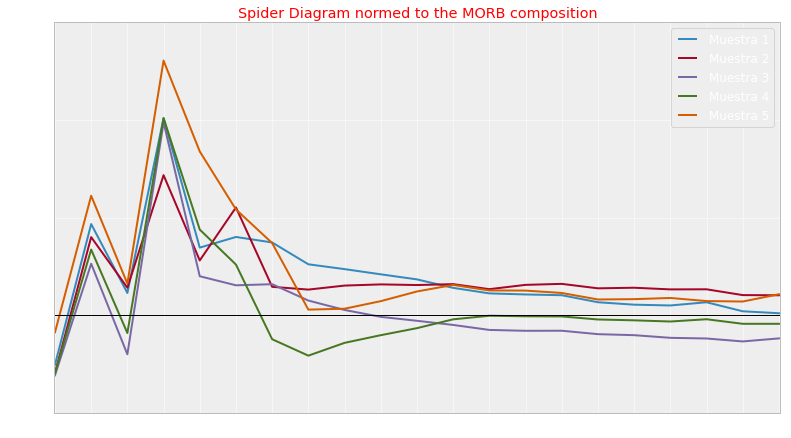

Composition anomalies in relation to the MORB presented in the following elements ['U', 'Tl', 'Mo', 'Pb']

DIAGNOSIS
Congratulations, you have found a match! The samples provided correspond to a MORB.


In [74]:
spider(44,n)


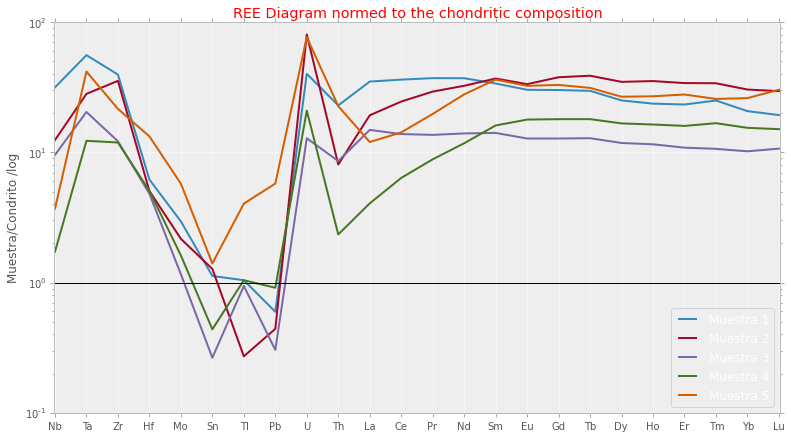

Composition anomalies in relation to the Chondrite presented in the following elements ['Sm', 'U', 'Hf', 'Th', 'Ce', 'Gd', 'Ta', 'Ho', 'Nd', 'Tb', 'Lu', 'Pr', 'Yb', 'La', 'Eu', 'Zr', 'Tm', 'Nb', 'Dy', 'Er']

DIAGNOSIS
The samples you colleceted probably do not belong to a Chondrite, please try another diagram.


In [75]:
TR(1,n)


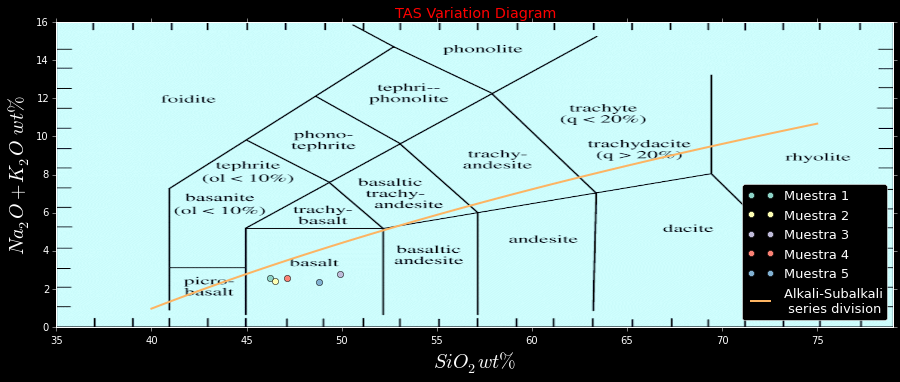

DIAGNOSIS
The rock you are studying has crystallized from a Basic Magma due to its characteristic content of silica.
The samples you collected share a strong affinity to the subalkali series.


In [76]:
TAS(2,n)

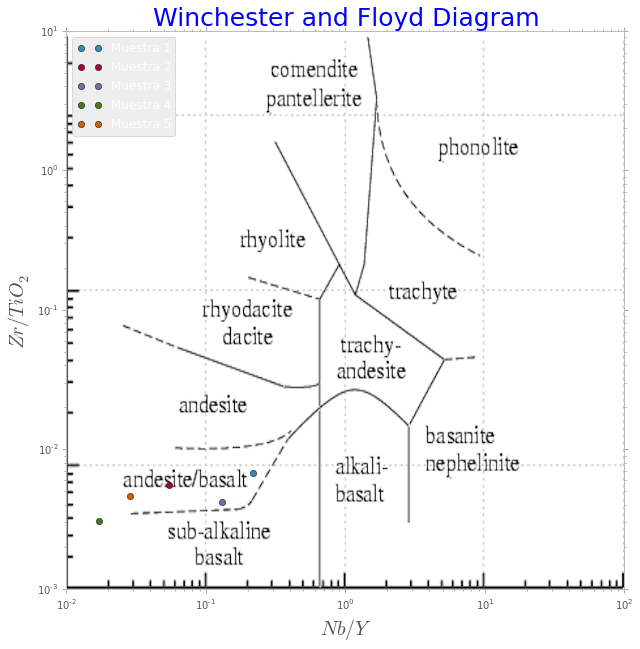

DIAGNOSIS
The results are reliable! Your rock falls in the category shown above.


In [77]:
winchester(1,n)

##BORED OF ALL THE GRAPHING? *GeoDiagram Assistant* has some other cool stuff too... 
Please run the following code to see how *GeoDiagram Assitant* did you Spider Diagram sample by sample out of nothing!


*(When executed a .mp4 file called spiderAnim will download to your computer with the animation).*

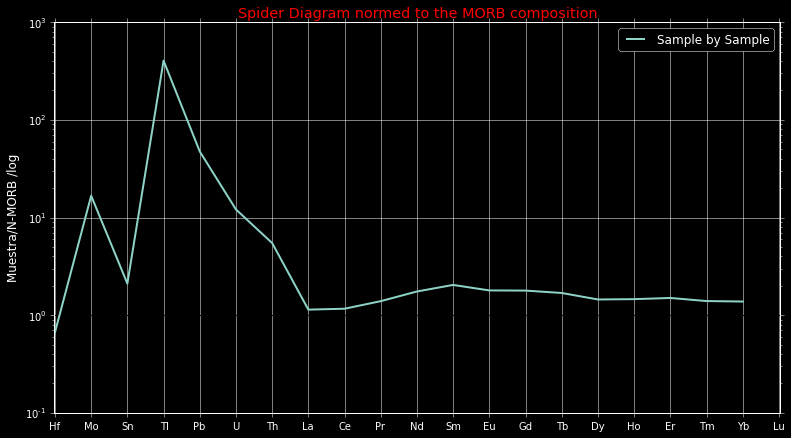

In [63]:
animatedSpider(2)